In [1]:
import pandas as pd
import sqlite3
import time

In [7]:
df = pd.read_csv("./data/YELP/business_only.csv", on_bad_lines='skip') #,lines=True

In [8]:
df.head()

,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,"1616 Chapala St, Ste 2",Pns2l4eNsfO8kk83dixA6A,"Doctors, Traditional Chinese Medicine, Naturop...",Santa Barbara,0,34.426679,-119.711197,"Abby Rappoport, LAC, CMQ",93101,7,5.0,CA
1,87 Grasso Plaza Shopping Center,mpf3x-BjTdTEA3yCZrAYPw,"Shipping Centers, Local Services, Notaries, Ma...",Affton,1,38.551126,-90.335695,The UPS Store,63123,15,3.0,MO
2,5255 E Broadway Blvd,tUFrWirKiKi_TAnsVWINQQ,"Department Stores, Shopping, Fashion, Home & G...",Tucson,0,32.223236,-110.880452,Target,85711,22,3.5,AZ
3,935 Race St,MTSW4McQd7CbVtyjqoe9mw,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",Philadelphia,1,39.955505,-75.155564,St Honore Pastries,19107,80,4.0,PA
4,101 Walnut St,mWMc6_wTdE0EUBKIGXDVfA,"Brewpubs, Breweries, Food",Green Lane,1,40.338183,-75.471659,Perkiomen Valley Brewery,18054,13,4.5,PA


In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
address,145218,122842,160 N Gulph Rd,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_id,150345,150345,Pns2l4eNsfO8kk83dixA6A,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,150242,83160,"Beauty & Spas, Nail Salons",1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,150345,1381,Philadelphia,14570,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_open,150345.0,NaN,NaN,NaN,0.796149,0.402861,0.0,1.0,1.0,1.0,1.0
latitude,150345.0,NaN,NaN,NaN,36.671195,5.872753,27.555127,32.187324,38.777418,39.954036,53.679197
longitude,150345.0,NaN,NaN,NaN,-89.357335,14.918551,-120.095137,-90.357811,-86.121178,-75.421526,-73.200457
name,150345,114096,Starbucks,724,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,150272,3361,93101,1866,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_count,150345.0,NaN,NaN,NaN,44.866826,121.120495,5.0,8.0,15.0,37.0,7568.0


Create Adult database and import data fro csv to SQL table:

In [ ]:
!fuser adult.db
!kill -9 34824

Specified filename adult.db does not exist.
/bin/bash: line 1: kill: (34824) - No such process


In [ ]:
df_describe = df.describe(include='all').T
df_describe['col_name'] = df_describe.index
#print(df_describe)
conn = sqlite3.connect('adult.db')
print("Opened database successfully");

conn.execute(''' DROP TABLE IF EXISTS tb_adult;''')
conn.execute(''' DROP TABLE IF EXISTS tb_describe;''')
conn.execute('''
    CREATE TABLE IF NOT EXISTS tb_adult( age integer,
                                          workclass          text,
                                          fnlwgt             integer,
                                          education          text,
                                          educational_num    integer,
                                          marital_status     text,
                                          occupation         text,
                                          relationship       text,
                                          race               text,
                                          gender             text,
                                          capital_gain       integer,
                                          capital_loss       integer,
                                          hours_per_week     integer,
                                          native_country     text,
                                          income             text
    );
''')

conn.execute('''
    CREATE TABLE IF NOT EXISTS tb_describe( count integer,
                                            unique_value integer,
                                            top text,
                                            freq integer,
                                            mean real,
                                            std real,
                                            min real,
                                            percent_25 real,
                                            percent_50 real,
                                            percent_75 real,
                                            max real,
                                            col_name text
    );
''')

conn.commit()
print("Table created successfully");
#conn.close()

Opened database successfully
Table created successfully


In [ ]:
col_names= ['age', 'workclass', 'fnlwgt', 'education', 'educational_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income']
col_names_describe = ['count', 'unique_value', 'top', 'freq', 'mean', 'std', 'min', 'percent_25', 'percent_50',
       'percent_75', 'max','col_name']
df = df.set_axis(col_names, axis=1)
df_describe = df_describe.set_axis(col_names_describe, axis=1)
df.to_sql('tb_adult', conn, if_exists='append', index=False)
df_describe.to_sql('tb_describe', conn, if_exists='append', index=False)

15

Append Catalog data to table

In [ ]:
cat_cols = ['age_min integer ','age_max integer ','age_25_percent integer ','age_50_percent integer ', 'age_75_percent integer ',
            'hours_per_week_min integer ','hours_per_week_max integer ','hours_per_week_25_percent integer ','hours_per_week_50_percent integer ', 'hours_per_week_75_percent integer ',
            'workclass_private  integer ','education_hs_grad  integer ',
            'marital_status_married_civ_spouse integer ','occupation_prof_specialty integer ',
            'relationship_husband integer ','race_white integer ','gender_male integer ',
            'native_country_united_states integer ','income_less_than_50 integer']

for qs in cat_cols:
  conn.execute(f''' ALTER TABLE tb_adult ADD COLUMN {qs};''')
  conn.commit()

In [ ]:
cat_data = ['SET age_min = 1 WHERE age = 17', 'SET age_max=1 WHERE age=90', 'SET age_25_percent=1 WHERE age=28', 'SET age_50_percent=1 WHERE age=37',
            'SET age_75_percent=1 WHERE age=48', 'SET hours_per_week_min=1 WHERE  hours_per_week=1', 'SET hours_per_week_max=1 WHERE  hours_per_week=99',
            'SET hours_per_week_25_percent=1 WHERE  hours_per_week=40', 'SET hours_per_week_50_percent=1 WHERE  hours_per_week=40', 'SET hours_per_week_75_percent=1 WHERE  hours_per_week=45',
            'SET workclass_private=1 WHERE workclass=\'Private\'', 'SET education_hs_grad=1 WHERE education=\'HS-grad\'', 'SET marital_status_married_civ_spouse=1 WHERE marital_status=\'married-civ-spouse\'',
            'SET occupation_prof_specialty=1 WHERE occupation=\'Prof-specialty\'', 'SET relationship_husband=1 WHERE relationship=\'Husband\'', 'SET race_white=1 WHERE race=\'white\'',
            'SET gender_male=1 WHERE gender=\'male\'', 'SET native_country=\'United-states\'', 'SET income_less_than_50=1 WHERE income=\'<=50\'']
for cd in cat_data:
  conn.execute(f''' UPDATE tb_adult {cd};''')
  conn.commit()

In [ ]:
def fun_execute_queries(conn, q):
  st = time.time()
  cursor = conn.execute(f''' {q}''')
  et = time.time()

  # get the execution time
  elapsed_time = et - st

  return elapsed_time*1000, cursor

In [ ]:
conn = sqlite3.connect('adult.db')
# Query 1: filter data between min and max
q1_1 = 'SELECT * FROM tb_adult where age >= 17 and age <= 90;'
q1_2 = 'SELECT * FROM tb_adult;'

q1_1_et,_ = fun_execute_queries(conn, q1_1)
q1_2_et, _ = fun_execute_queries(conn, q1_2)

# Query 2: select TOP-1 workclass
q2_1 = 'SELECT workclass, count(*) FROM tb_adult GROUP BY workclass ORDER BY count(workclass) DESC LIMIT 1;'
q2_2 = 'SELECT \'workclass\', top FROM tb_describe WHERE col_name=\'workclass\';'

q2_1_et,_ = fun_execute_queries(conn, q2_1)
q2_2_et, _ = fun_execute_queries(conn, q2_2)

# Query 3: filter records with workclass=Private (filter orig data or filter catalog data?)
q3_1 = 'SELECT * FROM tb_adult WHERE workclass = \'Private\';'
q3_2 = 'SELECT * from tb_adult WHERE workclass_private=1;'

q3_1_et,_ = fun_execute_queries(conn, q3_1)
q3_2_et, _ = fun_execute_queries(conn, q3_2)

# Query 4:
q4_1 = 'SELECT * FROM tb_adult WHERE gender=\'male\' and income= \'<=50K \' and marital_status = \'Married-civ-spouse\' ;'
q4_2 = 'SELECT * FROM tb_adult WHERE gender_male=1 and income_less_than_50=1 and marital_status_married_civ_spouse=1 ;'



q4_1_et,_ = fun_execute_queries(conn, q4_1)
q4_2_et, _ = fun_execute_queries(conn, q4_2)

i = 0
for i in
conn.close()


   Queries  Query on orig data  Query on data catalog
0  Query 1            0.532866               0.143051
1  Query 2          330.328941               0.098944
2  Query 3            0.142813               0.082016
3  Query 4           84.027767             113.728285


Text(0, 0.5, 'Execution Time [ms]')

<Figure size 640x480 with 0 Axes>

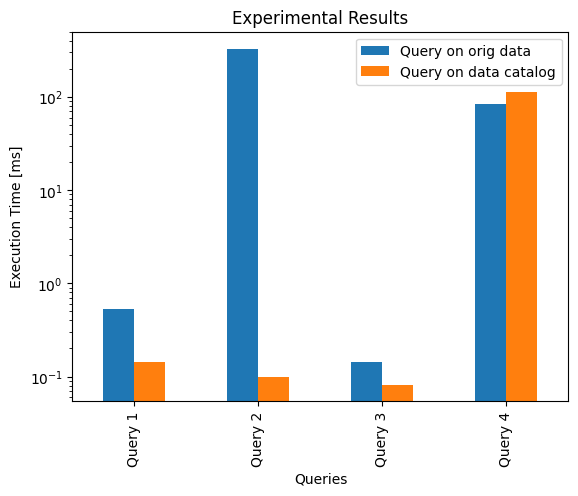

In [ ]:
from numpy import log
import matplotlib.pyplot as plt
# create data
df = pd.DataFrame([['Query 1', q1_1_et, q1_2_et],
                   ['Query 2', q2_1_et, q2_2_et],
                   ['Query 3', q3_1_et, q3_2_et],
                   ['Query 4', q4_1_et, q4_2_et]],
                  columns=['Queries', 'Query on orig data', 'Query on data catalog'])
print(df)
# plot grouped bar chart
plt.figure()
df.plot(x='Queries',
        kind='bar',
        stacked=False,
        log = True,
        title='Experimental Results')
plt.ylabel('Execution Time [ms]')